In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read and Understand Data

In [3]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

The dataset has 9240 rows and 37 columns.

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 2. Data Cleaning

Many categorical variables contains a value 'Select' that means those are not filled by the customer and should be trated as missing values.

In [7]:
#Replacing the values 'Select' to NaN
leads = leads.replace('Select',np.nan)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# Check the percentages of missing values in each column
round((leads.isnull().sum()/len(leads.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Removing the columns which have 45% or more missing values
cols = leads.columns
for i in cols:
    if (((leads[i].isnull().sum()/len(leads.index))*100) >=45):
        leads.drop(i, 1, inplace= True)

In [10]:
# Check the unique values in each column
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

1. There are no duplicate values in 'Prospect ID' and 'Lead Number' columns. Those are just the references of the ID number of the contacted persons and can be dropped.
2. Columns like 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' contain only single value. So these columns will not affect our analysis and need to be dropped.
3. There are few columns which are generated by the Sales Team looking at the Leads. One Such column is - 'Tags'.This will not of much help in our analysis. So We will remove this column as well.

In [11]:
# Drop Unnecessary Columns
leads = leads.drop(['Prospect ID', 'Lead Number', 'Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content', 'Get updates on DM Content',
                    'I agree to pay the amount through cheque', 'Tags'], axis=1)

In [12]:
# Check Missing Value Percentages in each column
round((leads.isnull().sum()/len(leads.index))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

## 2.1. Handle Missing Values

In [13]:
leads['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

The frequency in the 'Country' column is the highest for 'India'. However, we would like to check for which Country the lead conversion is the highest.

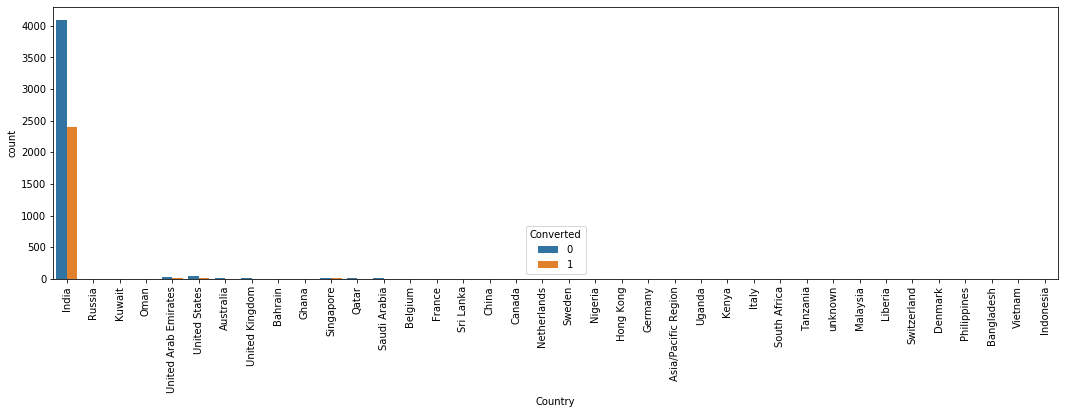

In [14]:
plt.figure(figsize=(18,5))
sns.countplot(leads['Country'],hue=leads.Converted)
plt.xticks(rotation = 90)
plt.show()

The above plot shows that the frequency of lead conversion is way higher for customers based out of'India'. Hence, we can impute the missing values with 'India'. Then this column will become a skewed column and must be dropped from the dataset.

In [15]:
# Adding 'Country' column to the 'cols_to_drop' list
cols_to_drop = ['Country']

In [16]:
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Maximum values are missing for the Speialization columns. We will convert it to Others.

In [17]:
#Replacing the NaN values with 'Others'
leads['Specialization'] = leads['Specialization'].replace(np.nan,'Others')

In [18]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
# Imputing NaN values with 'Unemployed'
leads['What is your current occupation'].replace(np.nan,'Unemployed',inplace=True)

In [20]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

'Better Career Prospects' is what matters to most people in choosing the course and if we replace the NaN values with 'Better Career Prospects', the column will become skewed and should be dropped from the dataset

In [21]:
# Adding 'What matters most to you in choosing a course' column to the 'cols_to_drop' list
cols_to_drop.append('What matters most to you in choosing a course')

In [22]:
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In 'City' column, 'Mumbai' has the highest frequency. So, We will impute the missing values as 'Mumbai'.

In [23]:
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

## 2.2: Handle Skewed Categorical Columns

In [24]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [25]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
youtubechannel          1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
WeLearn                 1
Name: Lead Source, dtype: int64

1. We will consider the occurrences of Google and google as same and represent it as Google.
2. Combine lower frequency and NaN values to Others.

In [26]:
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace([np.nan,'bing','Click2call','Social Media','Live Chat','Press_Release',
                                                     'NC_EDM','welearnblog_Home','youtubechannel','Pay per Click Ads',
                                                     'blog','testone','WeLearn'],'Others')

In [27]:
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                59
Facebook              55
Name: Lead Source, dtype: int64

In [28]:
leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [29]:
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [30]:
leads['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [31]:
leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [32]:
leads['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [33]:
leads['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [34]:
leads['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [35]:
leads['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [36]:
leads['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In the above analysis, there are many skewed columns in which almost more than 90% of the data points contain the same values. These skewed columns need to be dropped as it will not affect much in our analysis.

In [37]:
cols_to_drop.extend(['Do Not Call','Search','Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement',
                'Through Recommendations'])

In [38]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [39]:
# Combine NaN and Low Frequency Values to Others
leads['Last Activity'] = leads['Last Activity'].replace([np.nan,'Unreachable','Unsubscribed','Had a Phone Conversation',
                                                        'Approached upfront','View in browser link Clicked',
                                                        'Email Marked Spam','Email Received','Resubscribed to emails',
                                                        'Visited Booth in Tradeshow'],'Others')

In [40]:
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [41]:
# Combine lower frequency values to 'Others'
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                                                         'Had a Phone Conversation','Email Marked Spam',
                                                                         'Approached upfront','Email Received',
                                                                         'Resubscribed to emails',
                                                                         'View in browser link Clicked',
                                                                         'Form Submitted on Website'],'Others')

In [42]:
# Dropping unwanted columns
leads = leads.drop(cols_to_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
City                                      9240 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notable Activity                     9240 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 938.6+ KB


In [43]:
#Drop all rows which have Nan Values. Since the missing value % is very less, it will not affect the model
leads = leads.dropna()

In [44]:
# Checking The Missing Values
leads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [45]:
leads.shape

(9103, 13)

## 2.2 Handle Outliers in Numerical Attributes

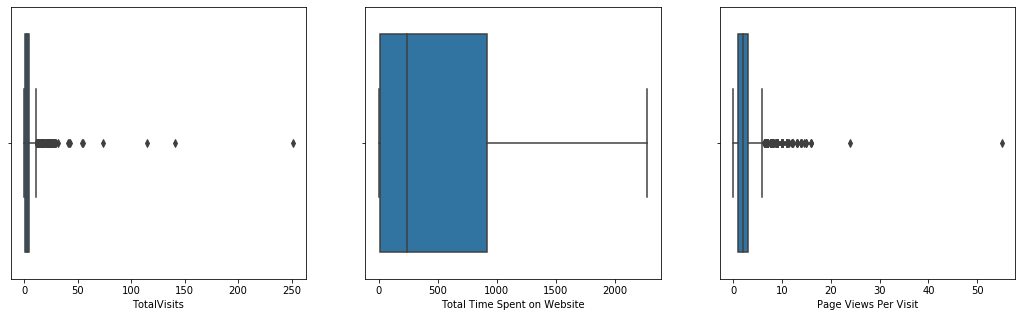

In [46]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(leads['TotalVisits'])
plt.subplot(1,3,2)
sns.boxplot(leads['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

TotalVisits and Page Views Per Visit contains outliers especially in the higher values. So we need cap the upper set of values.

In [47]:
leads['TotalVisits'].quantile([0.01,.25, .5, .75, .90, .95, .99])

0.01     0.0
0.25     1.0
0.50     3.0
0.75     5.0
0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

In [48]:
# Capping Outliers
q3 = leads.TotalVisits.quantile(0.99)
leads = leads[leads.TotalVisits <= q3]

In [49]:
leads['Page Views Per Visit'].quantile([0.05,.25, .5, .75, .90, .95, .99])

0.05    0.0
0.25    1.0
0.50    2.0
0.75    3.0
0.90    5.0
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

In [50]:
# Capping Outliers
q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= q3]

In [51]:
leads.shape

(8953, 13)

The final cleaned dataset contains 8953 rows and 13 columns

## 2.3: EDA

### 2.3.1: Univariate Analysis of Categorical Variables in relation to 'Converted' column

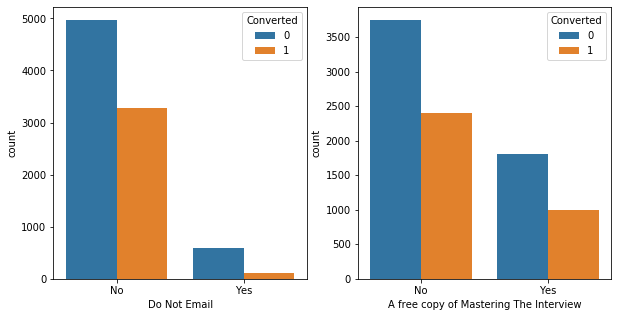

In [52]:
# Analysis on Binary Categorical Variables
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(leads['Do Not Email'],hue = leads.Converted)

plt.subplot(1,2,2)
sns.countplot(leads['A free copy of Mastering The Interview'],hue= leads.Converted)
plt.show()

1. Most of the leads do not want to be emailed about the course and also do not want the free copy of mastering the interview.
2. Those leads who do not want to be emailed have high chances of getting converted.

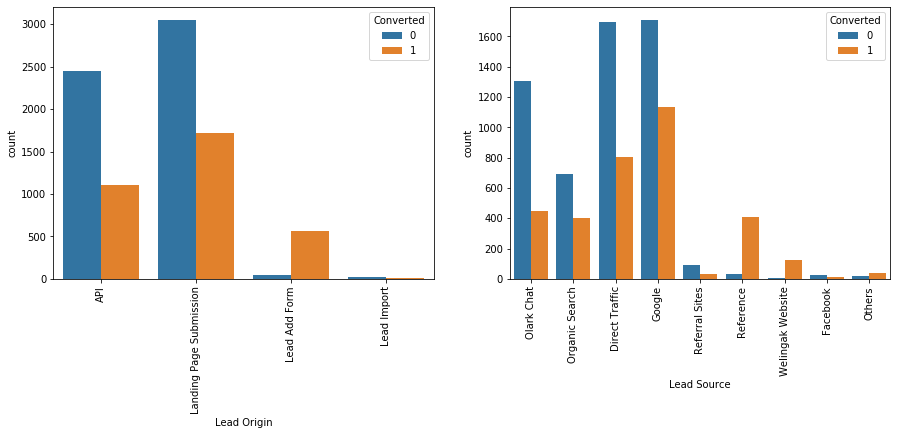

In [53]:
# Analysis on Other Categorical Variables
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(leads['Lead Origin'],hue = leads.Converted)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(leads['Lead Source'],hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

Inferences from Lead Origin - 
1. Lead Add Form has a very high conversion rate but count of leads are not very high.
2. API and Landing Page Submission bring higher number of leads as well as conversion.
3. In order to improve overall lead conversion rate, we need to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.


Inferences from Lead Source - 
1. Reference and Welingak Website have very high conversion rate but count of leads are not very high.
2. Google, Direct Traffic and Olark Chat bring higher number of leads as well as conversion.

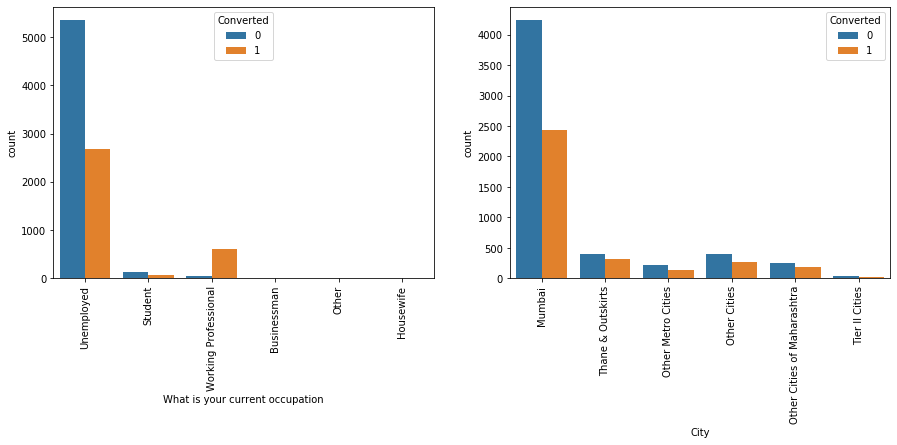

In [54]:
# Analysis on Other Categorical Variables
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(leads['What is your current occupation'],hue = leads.Converted)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(leads['City'],hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

Inferences from 'What is your current occupation' - 
1. Working professional checking about the course have high chances of joining the course.
2. Higher number of leads as well as conversion from Unemployed category.

Inferences from 'City' - 
1. Mumbai has the highest number of leads as well as conversion.

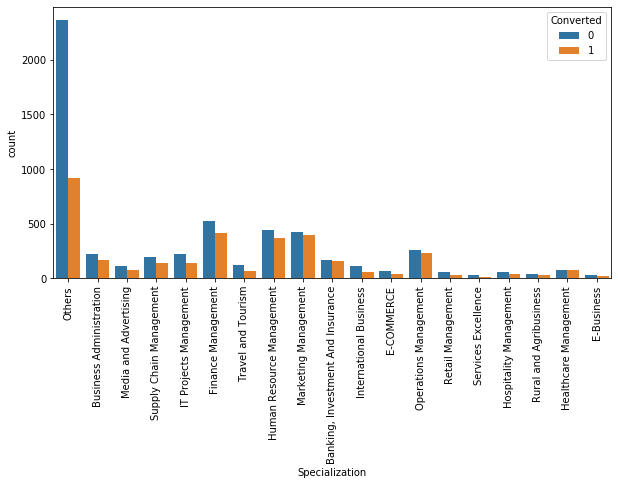

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(leads.Specialization,hue=leads.Converted)
plt.xticks(rotation = 90)
plt.show()

Inferences from 'Specialization' - 
1. Highest number of leads as well as conversion fall in 'Others' category. However, this category is the bucket of 'Not Specified' Values.
2. Finance Management, Human Resource Management, Marketing Management, Operations Management are showing reasonably good results in terms of count of leads as well as conversion.

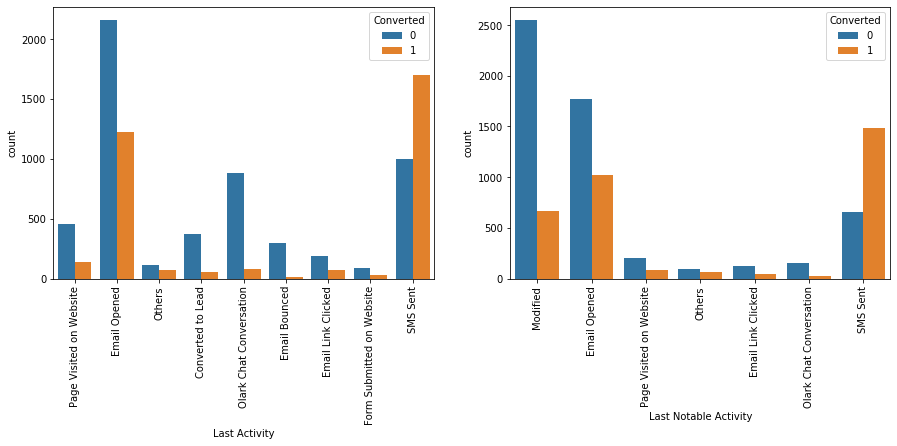

In [56]:
# Analysis on Other Categorical Variables
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(leads['Last Activity'],hue = leads.Converted)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(leads['Last Notable Activity'],hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

Inferences from 'Last Activity' -
1. Although the count is high for 'Email Opened', but the highest conversion rate from 'SMS Sent' Category.

Inferences from 'Last Activity' -
1. High Conversion rate is for 'Email Opened' and 'SMS Sent' Category.
2. Lead count is highest for 'Modified' and 'Email Opened' category.

### 2.3.2: Bivariate Analysis on Numerical Columns

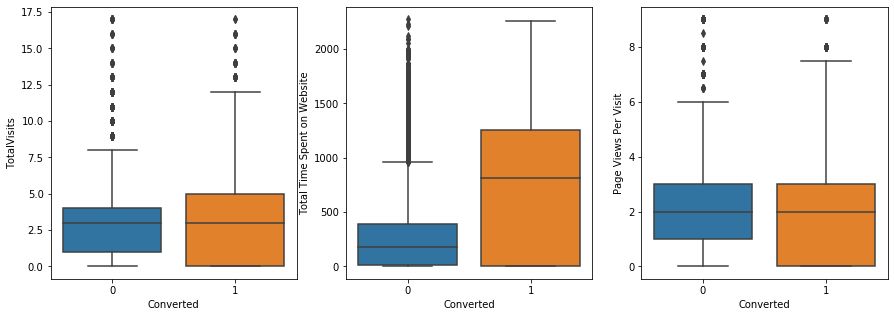

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data=leads)

plt.subplot(1,3,2)
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data=leads)

plt.subplot(1,3,3)
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data=leads)
plt.show()

1. Nothng conclusive can be said on the basis of Total Visits and Page Views Per Visit.
2. Leads spending more time on the website are more likely to be converted.

# 3. Data Preparation

## 3.1: Converting some binary variables (Yes/No) to 0/1

In [58]:
# List of variables to map
varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable list
leads[varlist] = leads[varlist].apply(binary_map)

In [59]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0,Modified


## 3.2: Create Dummy Variables

In [60]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(leads[['Lead Origin', 'What is your current occupation', 'City']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [61]:
# Creating dummy variables for the remaining categorical variables

# Creating dummy variables for 'Lead Source'
lo = pd.get_dummies(leads['Lead Source'],prefix='Lead Source')
lo = lo.drop(['Lead Source_Others'],1)
# Adding the results to the master dataframe
leads = pd.concat([leads, lo], axis=1)

# Creating dummy variables for 'Last Activity'
la = pd.get_dummies(leads['Last Activity'],prefix='Last Activity')
la = la.drop(['Last Activity_Others'],1)
# Adding the results to the master dataframe
leads = pd.concat([leads, la], axis=1)

# Creating dummy variables for 'Specialization'
spl = pd.get_dummies(leads['Specialization'],prefix='Specialization')
spl = spl.drop(['Specialization_Others'],1)
# Adding the results to the master dataframe
leads = pd.concat([leads, spl], axis=1)

# Creating dummy variables for 'Last Notable Activity'
lna = pd.get_dummies(leads['Last Notable Activity'],prefix='Last Notable Activity')
lna = lna.drop(['Last Notable Activity_Others'],1)
# Adding the results to the master dataframe
leads = pd.concat([leads, lna], axis=1)

In [62]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,1,0,0,0


#### Dropping repeated variables

In [63]:
leads = leads.drop(['Lead Origin', 'What is your current occupation', 'City', 'Lead Source', 'Last Activity', 'Specialization',
                    'Last Notable Activity'],1)

In [64]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 59 columns):
Do Not Email                                            8953 non-null int64
Converted                                               8953 non-null int64
TotalVisits                                             8953 non-null float64
Total Time Spent on Website                             8953 non-null int64
Page Views Per Visit                                    8953 non-null float64
A free copy of Mastering The Interview                  8953 non-null int64
Lead Origin_Landing Page Submission                     8953 non-null uint8
Lead Origin_Lead Add Form                               8953 non-null uint8
Lead Origin_Lead Import                                 8953 non-null uint8
What is your current occupation_Housewife               8953 non-null uint8
What is your current occupation_Other                   8953 non-null uint8
What is your current occupation_Student              

## 3.3: Train-Test Split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# Putting feature variable to X
X = leads.drop('Converted',axis=1)

# Putting response variable to y
y = leads['Converted']

In [67]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 3.4: Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0,0.668862,1.848117,1.455819,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4696,0,-0.030697,-0.037832,0.399961,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3274,0,0.319082,-0.642138,-0.127967,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2164,0,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1667,0,0.319082,1.258415,-0.481679,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 4. Modelling

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

## 4.1: RFE

In [72]:
# Running RFE with 15 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

In [73]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True, False])

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('A free copy of Mastering The Interview', False, 33),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 36),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 28),
 ('What is your current occupation_Student', False, 27),
 ('What is your current occupation_Unemployed', False, 25),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 38),
 ('City_Other Cities of Maharashtra', False, 41),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 42),
 ('City_Tier II Cities', False, 37),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', False, 31),
 ('Lead Source_O

In [75]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

## 4.2: Use statsmodels

In [76]:
# Building 1st Model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.6
Date:                Sat, 05 Sep 2020   Deviance:                       5301.2
Time:                        21:19:09   Pearson chi2:                 6.30e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6761      0.075      9.066      0.000       0.530       0.822
Do Not Email                                            -1.6895      0.175     -9.634      0.000      -2.033      -1.346
Total Time Spent on Website                              0.9379      0.035     26.439      0.000       0.868       1.007
Lead Origin_Lead Add Form                                3.6829      0.243     15.170      0.000       3.207       4.159
What is your current occupation_Housewife               22.9287   1.84e+04      0.001      0.999   -3.59e+04     3.6e+04
What is your current occupation_Working Professional     2.6593      0.194     13.676      0.000       2.278       3.040
Lead Source_Direct Traffic                              -0.6734      0.082     -8.238      0.000      -0.834      -0.513
Lead Source_Organic Search                              -0.3913      0.106     -3.676      0.000      -0.600      -0.183
Lead Source_Referral Sites                              -0.6557      0.319     -2.056      0.040      -1.281      -0.031
Lead Source_Welingak Website                             2.3122      1.039      2.225      0.026       0.276       4.349
Last Activity_Olark Chat Conversation                   -0.9913      0.191     -5.202      0.000      -1.365      -0.618
Last Notable Activity_Email Link Clicked                -1.8397      0.271     -6.780      0.000      -2.371      -1.308
Last Notable Activity_Email Opened                      -1.4279      0.087    -16.336      0.000      -1.599      -1.257
Last Notable Activity_Modified                          -1.8888      0.095    -19.799      0.000      -2.076      -1.702
Last Notable Activity_Olark Chat Conversation           -2.0802      0.418     -4.978      0.000      -2.899      -1.261
Last Notable Activity_Page Visited on Website           -1.7831      0.211     -8.438      0.000      -2.197      -1.369
========================================================================================================================
"""

The variable 'What is your current occupation_Housewife' has very high p-value, So we can drop it.

In [77]:
# Dropping the column with high p-value
col = col.drop('What is your current occupation_Housewife',1)

In [78]:
# Building 2nd Model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.6
Date:                Sat, 05 Sep 2020   Deviance:                       5309.1
Time:                        21:19:09   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6750      0.075      9.054      0.000       0.529       0.821
Do Not Email                                            -1.6913      0.175     -9.644      0.000      -2.035      -1.348
Total Time Spent on Website                              0.9374      0.035     26.443      0.000       0.868       1.007
Lead Origin_Lead Add Form                                3.6947      0.243     15.232      0.000       3.219       4.170
What is your current occupation_Working Professional     2.6564      0.194     13.662      0.000       2.275       3.038
Lead Source_Direct Traffic                              -0.6744      0.082     -8.254      0.000      -0.835      -0.514
Lead Source_Organic Search                              -0.3811      0.106     -3.590      0.000      -0.589      -0.173
Lead Source_Referral Sites                              -0.6571      0.319     -2.061      0.039      -1.282      -0.032
Lead Source_Welingak Website                             2.2983      1.039      2.212      0.027       0.262       4.335
Last Activity_Olark Chat Conversation                   -0.9948      0.191     -5.222      0.000      -1.368      -0.621
Last Notable Activity_Email Link Clicked                -1.8400      0.271     -6.780      0.000      -2.372      -1.308
Last Notable Activity_Email Opened                      -1.4235      0.087    -16.296      0.000      -1.595      -1.252
Last Notable Activity_Modified                          -1.8848      0.095    -19.774      0.000      -2.072      -1.698
Last Notable Activity_Olark Chat Conversation           -2.0757      0.418     -4.968      0.000      -2.895      -1.257
Last Notable Activity_Page Visited on Website           -1.7822      0.211     -8.434      0.000      -2.196      -1.368
========================================================================================================================
"""

p-value of all variables are less. So we can check Variance Inflation Factor to see if there is any correlation between the variables.

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_Olark Chat Conversation,1.73
11,Last Notable Activity_Modified,1.72
2,Lead Origin_Lead Add Form,1.50
4,Lead Source_Direct Traffic,1.44
7,Lead Source_Welingak Website,1.32
12,Last Notable Activity_Olark Chat Conversation,1.32
10,Last Notable Activity_Email Opened,1.26
5,Lead Source_Organic Search,1.17
0,Do Not Email,1.14
3,What is your current occupation_Working Profes...,1.14


The variable 'Lead Source_Referral Sites' has high p-value, So we can drop it.

In [81]:
# Dropping the column with high p-value
col = col.drop('Lead Source_Referral Sites',1)

In [82]:
# Building 3rd Model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2656.9
Date:                Sat, 05 Sep 2020   Deviance:                       5313.8
Time:                        21:19:09   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6637      0.074      8.928      0.000       0.518       0.809
Do Not Email                                            -1.6966      0.176     -9.666      0.000      -2.041      -1.353
Total Time Spent on Website                              0.9357      0.035     26.415      0.000       0.866       1.005
Lead Origin_Lead Add Form                                3.7096      0.243     15.296      0.000       3.234       4.185
What is your current occupation_Working Professional     2.6574      0.195     13.663      0.000       2.276       3.039
Lead Source_Direct Traffic                              -0.6580      0.081     -8.089      0.000      -0.817      -0.499
Lead Source_Organic Search                              -0.3650      0.106     -3.446      0.001      -0.573      -0.157
Lead Source_Welingak Website                             2.2982      1.039      2.212      0.027       0.262       4.335
Last Activity_Olark Chat Conversation                   -0.9951      0.190     -5.224      0.000      -1.368      -0.622
Last Notable Activity_Email Link Clicked                -1.8474      0.271     -6.815      0.000      -2.379      -1.316
Last Notable Activity_Email Opened                      -1.4276      0.087    -16.354      0.000      -1.599      -1.257
Last Notable Activity_Modified                          -1.8910      0.095    -19.852      0.000      -2.078      -1.704
Last Notable Activity_Olark Chat Conversation           -2.0747      0.418     -4.968      0.000      -2.893      -1.256
Last Notable Activity_Page Visited on Website           -1.8080      0.211     -8.557      0.000      -2.222      -1.394
========================================================================================================================
"""

p-value of all variables are less. So we can check Variance Inflation Factor to see if there is any correlation between the variables.

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Olark Chat Conversation,1.73
10,Last Notable Activity_Modified,1.70
2,Lead Origin_Lead Add Form,1.50
4,Lead Source_Direct Traffic,1.43
6,Lead Source_Welingak Website,1.32
11,Last Notable Activity_Olark Chat Conversation,1.32
9,Last Notable Activity_Email Opened,1.24
5,Lead Source_Organic Search,1.17
0,Do Not Email,1.14
3,What is your current occupation_Working Profes...,1.14


In [84]:
col = col.drop('Lead Source_Welingak Website',1)

In [85]:
# Building 4th Model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.6
Date:                Sat, 05 Sep 2020   Deviance:                       5323.2
Time:                        21:19:10   Pearson chi2:                 6.46e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6632      0.074      8.925      0.000       0.518       0.809
Do Not Email                                            -1.6945      0.175     -9.675      0.000      -2.038      -1.351
Total Time Spent on Website                              0.9356      0.035     26.419      0.000       0.866       1.005
Lead Origin_Lead Add Form                                4.0426      0.234     17.276      0.000       3.584       4.501
What is your current occupation_Working Professional     2.6505      0.195     13.610      0.000       2.269       3.032
Lead Source_Direct Traffic                              -0.6574      0.081     -8.083      0.000      -0.817      -0.498
Lead Source_Organic Search                              -0.3647      0.106     -3.443      0.001      -0.572      -0.157
Last Activity_Olark Chat Conversation                   -0.9953      0.190     -5.226      0.000      -1.369      -0.622
Last Notable Activity_Email Link Clicked                -1.8570      0.272     -6.817      0.000      -2.391      -1.323
Last Notable Activity_Email Opened                      -1.4273      0.087    -16.355      0.000      -1.598      -1.256
Last Notable Activity_Modified                          -1.8903      0.095    -19.856      0.000      -2.077      -1.704
Last Notable Activity_Olark Chat Conversation           -2.0440      0.412     -4.967      0.000      -2.851      -1.237
Last Notable Activity_Page Visited on Website           -1.8092      0.211     -8.557      0.000      -2.224      -1.395
========================================================================================================================
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.73
9,Last Notable Activity_Modified,1.70
4,Lead Source_Direct Traffic,1.43
10,Last Notable Activity_Olark Chat Conversation,1.32
8,Last Notable Activity_Email Opened,1.24
5,Lead Source_Organic Search,1.17
2,Lead Origin_Lead Add Form,1.16
0,Do Not Email,1.14
1,Total Time Spent on Website,1.13
3,What is your current occupation_Working Profes...,1.12


All VIFs are low and p-values are below 0.05. So we can go ahead with model prediction

# 5. Model Prediction

In [87]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.916237
4696    0.492602
3274    0.515607
2164    0.085718
1667    0.601870
7024    0.170785
8018    0.039465
778     0.099658
6942    0.045723
4440    0.150345
dtype: float64

In [88]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.91623664, 0.49260158, 0.51560693, 0.08571849, 0.60187007,
       0.17078491, 0.03946498, 0.09965832, 0.04572319, 0.15034451])

In [89]:
# Data frame with given Converted and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID
0,1,0.916237,9196
1,0,0.492602,4696
2,0,0.515607,3274
3,0,0.085718,2164
4,1,0.601870,1667


In [90]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conv_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,Predicted
0,1,0.916237,9196,1
1,0,0.492602,4696,0
2,0,0.515607,3274,1
3,0,0.085718,2164,0
4,1,0.601870,1667,1


# 6. Model Evaluation

In [91]:
from sklearn import metrics

In [92]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3446  436]
 [ 830 1555]]


In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7979894686452849


In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6519916142557652

In [96]:
# Let us calculate specificity
TN / float(TN+FP)

0.88768675940237

# 7. Plotting ROC Curve

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False)

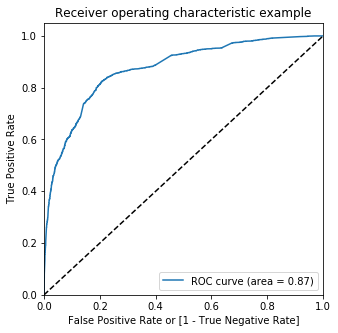

In [99]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

The area under the ROC curve is 0.87, which is a very good value.

# 8. Finding Optimal Cutoff Point

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.916237,9196,1,1,1,1,1,1,1,1,1,1,1
1,0,0.492602,4696,0,1,1,1,1,1,0,0,0,0,0
2,0,0.515607,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.085718,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.601870,1667,1,1,1,1,1,1,1,1,0,0,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.549226  0.978197  0.285677
0.2   0.2  0.745652  0.872537  0.667697
0.3   0.3  0.798628  0.840671  0.772798
0.4   0.4  0.806127  0.776101  0.824575
0.5   0.5  0.797989  0.651992  0.887687
0.6   0.6  0.790490  0.567715  0.927357
0.7   0.7  0.783629  0.501048  0.957239
0.8   0.8  0.761608  0.415933  0.973982
0.9   0.9  0.717409  0.273375  0.990211


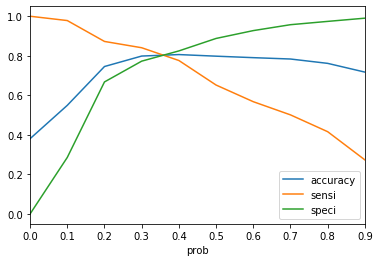

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.916237,9196,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.492602,4696,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.515607,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.085718,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.601870,1667,1,1,1,1,1,1,1,1,0,0,0,1


In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8053295037498005

In [105]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)

[[3106  776]
 [ 444 1941]]


In [106]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8138364779874214

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.8001030396702731

### Precision and Recall

In [109]:
# Let us calculate precision
TP/float(TP+FP)

0.7143908722856092

In [110]:
# Let us calculate recall
TP/float(TP+FN)

0.8138364779874214

In [111]:
from sklearn.metrics import precision_score, recall_score

In [112]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7810145655449523

In [113]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6519916142557652

### Precision and Recall Tradeoff

In [114]:
from sklearn.metrics import precision_recall_curve

In [115]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

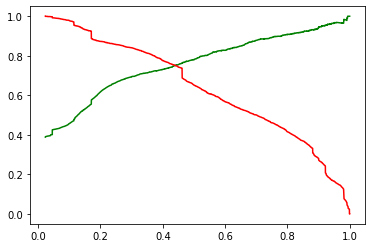

In [116]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 9. Making Predictions on Test Set

In [117]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [118]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [119]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Organic Search,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
7681,0,-0.304384,0,0,1,0,0,0,0,0,0,0
984,0,-0.538073,0,0,0,1,0,0,0,1,0,0
8135,1,0.794688,0,0,1,0,0,0,0,0,0,0
6915,0,-0.614753,0,0,0,0,0,0,1,0,0,0
2712,0,-0.412100,0,0,0,0,0,0,1,0,0,0


In [120]:
X_test_sm = sm.add_constant(X_test)

In [121]:
# Making Predictions on Test Set
y_test_pred = res.predict(X_test_sm)

In [122]:
y_test_pred[:10]

7681    0.430705
984     0.109572
8135    0.279847
6915    0.207636
2712    0.240555
244     0.198913
4698    0.132390
8287    0.045723
6791    0.460347
8970    0.183465
dtype: float64

In [123]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [124]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [125]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [126]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [127]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [128]:
y_pred_final.head()

,Converted,LeadID,0
0,0,7681,0.430705
1,0,984,0.109572
2,0,8135,0.279847
3,0,6915,0.207636
4,1,2712,0.240555


In [129]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [130]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,LeadID,Conv_Prob,final_predicted
0,0,7681,0.430705,1
1,0,984,0.109572,0
2,0,8135,0.279847,0
3,0,6915,0.207636,0
4,1,2712,0.240555,0


In [131]:
# Calculating Lead Score
y_pred_final['Lead_Score'] = y_pred_final.Conv_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,LeadID,Conv_Prob,final_predicted,Lead_Score
0,0,7681,0.430705,1,43
1,0,984,0.109572,0,11
2,0,8135,0.279847,0,28
3,0,6915,0.207636,0,21
4,1,2712,0.240555,0,24


In [132]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8015636634400596

In [133]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion2)

[[1334  342]
 [ 191  819]]


In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.810891089108911

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.7959427207637232

# 10. Observation and Conclusion

Training Set:
- Accuracy:80.53%
- Sensitivity:81.38%
- Specificity:80.01%

Test Set:
- Accuracy:80.15%
- Sensitivity:81.09%
- Specificity:79.59%

The ability of accurately predicting the conversion rate of any lead from the model is around 80%.

The probability of predicting a promising lead from the model is around 81%.


The model seems to predict the Lead Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model.

It is found that the variables that mattered most in the lead conversion are -
- Lead Origin_Lead Add Form
- What is your current occupation_Working Professional
- Total Time Spent on Website
- Lead Source_Organic Search
- Lead Source_Direct Traffic
- Last Activity_Olark Chat Conversation
- Last Notable Activity_Email Opened
- Do Not Email
- Last Notable Activity_Page Visited on Website
- Last Notable Activity_Email Link Clicked
- Last Notable Activity_Modified
- Last Notable Activity_Olark Chat Conversation